Name: Khushi Shah

Roll no: B067

Aim: Apply region growing method to segment an object of the given image

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray

In [ ]:
img=np.array([[1,5,0,3,9],[5,7,5,2,6],[0,6,0,5,0],[1,5,1,3,8]])
mx=np.max(np.max(img))
mx

9

Text(0.5, 1.0, 'ORIGINAL IMAGE')

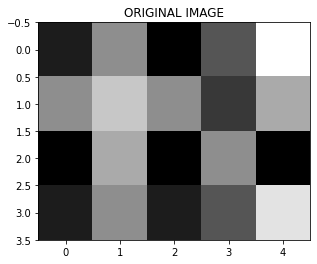

In [ ]:
plt.imshow(img,cmap='gray')
plt.title('ORIGINAL IMAGE')

In [ ]:
def dist(p,q):
  temp=np.abs(p-q)#abs for absolute value
  return temp

#im_o=original image matrix im_r=representative image matrix of all 0s t=thresthold value s=location of seed pixel
def r_g(im_o,im_r,t,s):
  row_seed=s[0]
  col_seed=s[1]
  im_r[row_seed,col_seed]=1
  [row,col]=im_o.shape
  px=im_o[row_seed,col_seed]
  if col_seed + 1 < col and im_r[row_seed,col_seed+1]==0 and dist(px,im_o[row_seed,col_seed+1])<=t :
    r_g(im_o,im_r,t,[row_seed,col_seed+1])
  if col_seed - 1 >= 0 and im_r[row_seed,col_seed-1]==0 and dist(px,im_o[row_seed,col_seed-1])<=t :
    r_g(im_o,im_r,t,[row_seed,col_seed-1])
  if row_seed + 1 < row and im_r[row_seed+1,col_seed]==0 and dist(px,im_o[row_seed+1,col_seed])<=t :
    r_g(im_o,im_r,t,[row_seed+1,col_seed])
  if row_seed - 1 >=0 and im_r[row_seed-1,col_seed]==0 and dist(px,im_o[row_seed-1,col_seed])<=t :
    r_g(im_o,im_r,t,[row_seed-1,col_seed])



In [ ]:
t=2
s=[3,0]
i_r=np.zeros(img.shape)
r_g(img,i_r,t,s)

Text(0.5, 1.0, 'Object')

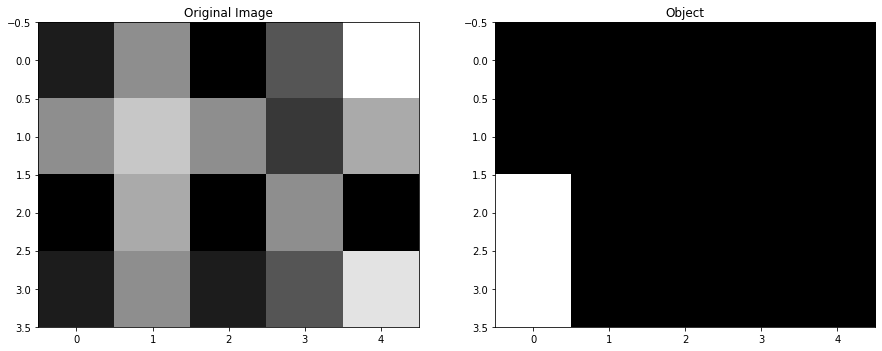

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(1,2,2)
plt.imshow(i_r, cmap = 'gray')
plt.title ('Object')

In [ ]:
#i_s=segmented image
i_s=img.copy()
[rw,cl]=i_s.shape
for r in range(rw):
  for c in range(cl):
    if i_r[r,c]==1:
      i_s[r,c]=mx

Text(0.5, 1.0, 'Segmented Image')

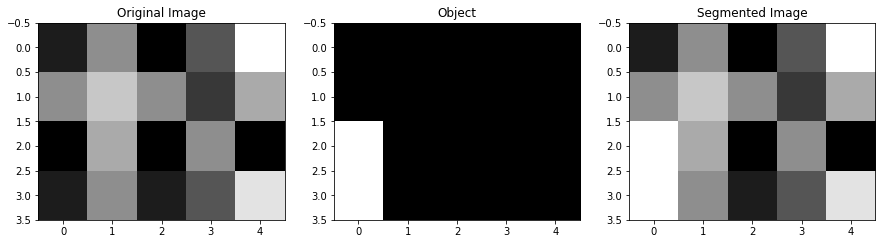

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(1,3,2)
plt.imshow(i_r, cmap = 'gray')
plt.title ('Object')
plt.subplot(1,3,3)
plt.imshow(i_s, cmap = 'gray')
plt.title ('Segmented Image')

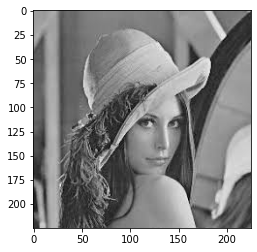

In [ ]:
image=io.imread('/content/lenna_grey (2).jpg')
plt.imshow(image, cmap='gray')

In [ ]:
image.shape


(225, 225, 3)

In [ ]:
image = rgb2gray(image);

In [ ]:
image.shape

(225, 225)

In [ ]:
image[2][3]

0.6196078431372549

In [ ]:
image=255*image
image[2][3]

158.0

In [ ]:
image=image[0:50,0:50]

In [ ]:
mx=np.max(np.max(image))
mx

179.0

In [ ]:
t=5
s=[5,10]
i_r=np.zeros(image.shape)
r_g(image,i_r,t,s)
i_r=i_r*255

In [ ]:
i_s=image.copy()
[rw,cl]=i_s.shape
for r in range(rw):
  for c in range(cl):
    if i_r[r,c]>250:
      i_s[r,c]=mx

Text(0.5, 1.0, 'Segmented Image')

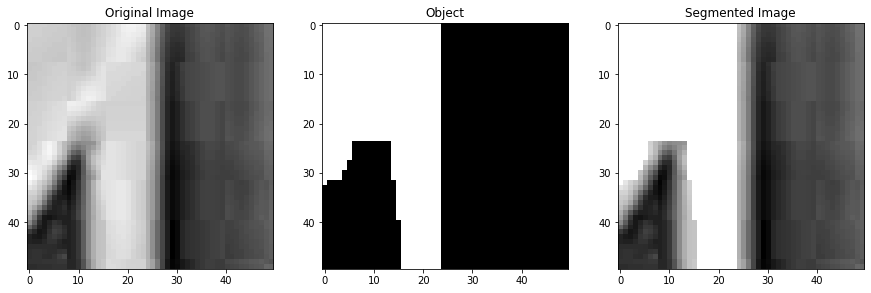

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(1,3,2)
plt.imshow(i_r, cmap = 'gray')
plt.title ('Object')
plt.subplot(1,3,3)
plt.imshow(i_s, cmap = 'gray')
plt.title ('Segmented Image')

Conclusion: Region growing is applied to segment the object of given image lena_gray. For threshold of seed value [5,10], the object is segmented by exploring neighbouring pixels without considering neighbouring diagonal pixels. If we change the seed value another object is segmented which is located around new seed value.